# Examining radiation mode coefficients

For paper method, it seems like they should be defined at leaky mode Z values, since those values should appear in the numerator of the modal coefficients.  Here we look at this.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

## Summary of observations

- Yes, they are defined at some leaky mode Z values, but they are zero there, since M11 entries are in numerator.

- Poles exist based on different criteria: M10 = 0 or M10 + 1/M01 = 0.  The latter equation sometimes has M11.conj as the solution.

In [2]:
A = SlabExact(scale=1e-6, Ts=[5, 1, 4, 2, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 300, 300, 500],
              symmetric=True, wl=1e-6)

In [45]:
def paper_coeffs(Z):
    M = A.transmission_matrix_Z(Z)
    r1 = -M[..., 1, 0] / M[..., 1, 1]
    t2 = 1 / M[..., 1, 1]
    frac = -M[..., 1, 0] / M[..., 0, 1]
    b = np.sqrt(frac, dtype=complex)
    return 1 / np.sqrt(r1 + b * t2, dtype=complex)

def paper_coeffs2(Z):
    M = A.transmission_matrix_Z(Z)
    return np.sqrt(M[..., 1, 1] / ( -M[..., 1, 0] + np.sqrt(-M[..., 1, 0] / M[..., 0, 1])))


def M11(Z):
    M = A.transmission_matrix_Z(Z)
    return M[..., 1, 1]

def denom(Z):
    M = A.transmission_matrix_Z(Z)
    return -M[..., 1, 0] + np.sqrt(-M[..., 1, 0] / M[..., 0, 1])

def eigeq(Z):
    M = A.transmission_matrix_Z(Z)
    return M[..., 1, 0] * (M[..., 1, 0] + 1 / M[..., 0, 1])


# it appears that the latter part of the eigeq is equivalent to M11.conj = 0... at least in some places

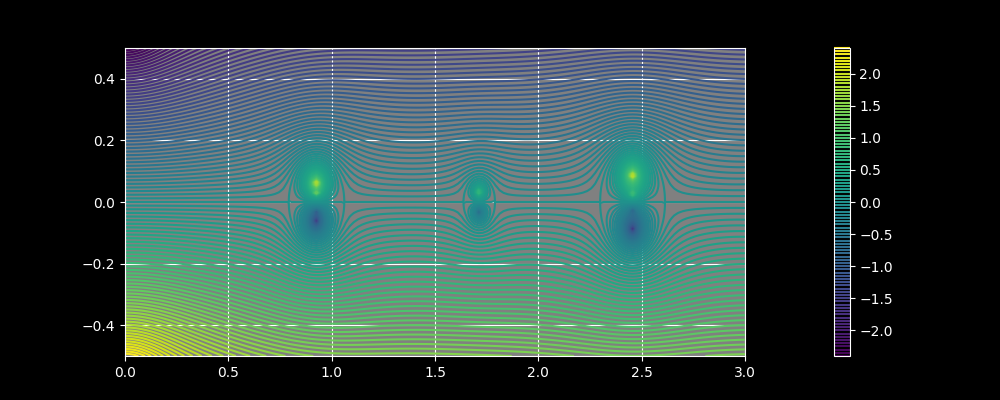

In [29]:
plot_complex(paper_coeffs2, 0, 3, -.5, .5, rref=150, iref=150, levels=100, figsize=(10,4), close_others=False)

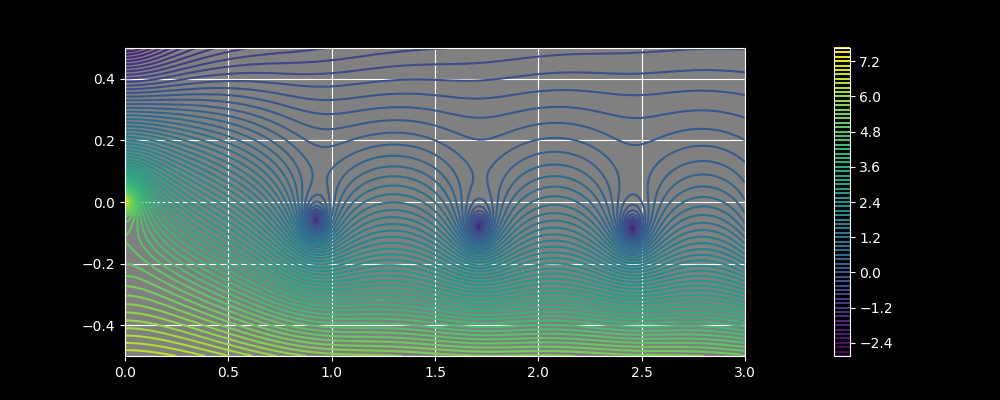

In [40]:
plot_complex(M11, 0, 3, -.5, .5, rref=150, iref=150, levels=100, figsize=(10,4), close_others=False)

In [41]:
Zleaky = newton(M11, np.array(.925-.06j))
Zleaky

(0.9241891446340363-0.06112219159688399j)

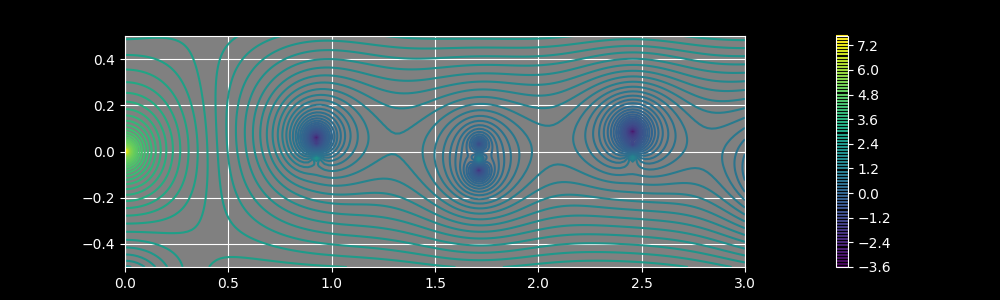

In [42]:
plot_complex(denom, 0, 3, -.5, .5, rref=150, iref=150, levels=100, figsize=(10,3), close_others=False)

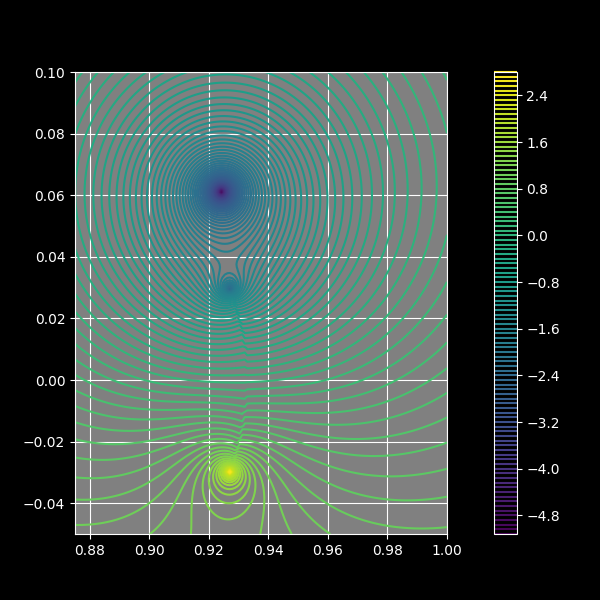

In [43]:
plot_complex(denom, .875, 1, -.05, .1, rref=150, iref=150, levels=100, figsize=(6,6), close_others=False)

In [44]:
A.plot_points([Zleaky.conj()])

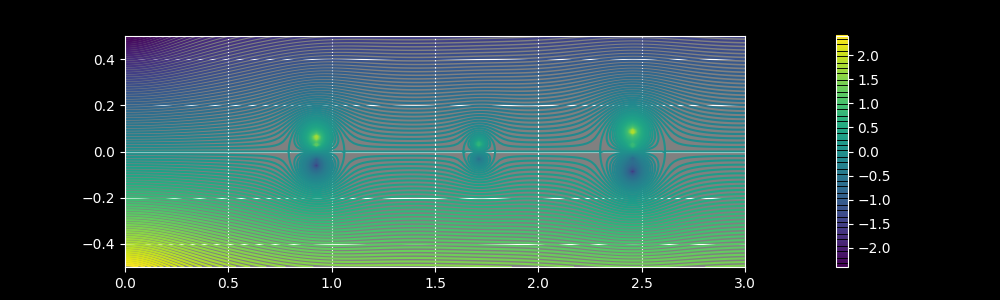

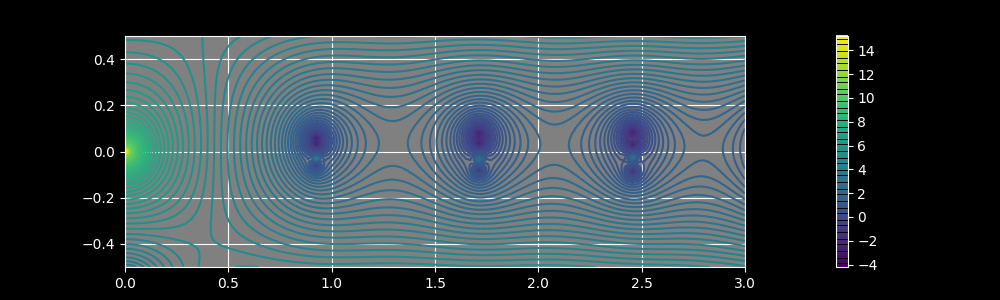

In [22]:
plt.close('all')
plot_complex(paper_coeffs2, 0, 3, -.5, .5, rref=150, iref=150, levels=100, figsize=(10,3), close_others=False)
plot_complex(eigeq, 0, 3, -.5, .5, rref=150, iref=150, levels=100, figsize=(10,3), close_others=False)

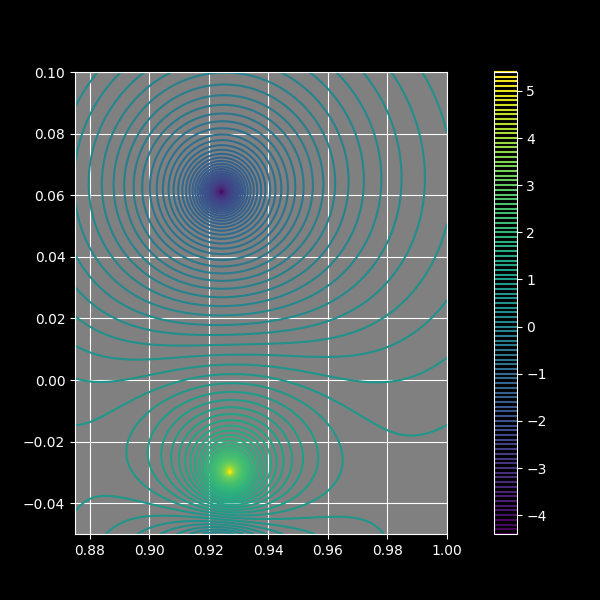

In [25]:
plot_complex(eigeq, .875, 1, -.05, .1, rref=150, iref=150, levels=100, figsize=(6,6), close_others=False)